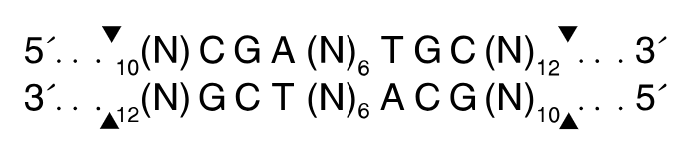

In [83]:
%%bash

python ./scripts/count_cutsites.py

Storing genome...
Finding sites... (this may take 2-5 minutes)
178698 instances of the GCA.{6}TCG|CGA.{6}TGC pattern covering 0.2419% of the genome


In [7]:
%%bash

python ./scripts/count_cutsites.py

Storing genome...
Finding sites... (this may take 2-5 minutes)
140172 instances of the GCA.{6}TCG|CGA.{6}TGC pattern covering 0.2293% of the genome


In [1]:
178698/25220

7.085567010309278

In [2]:
import re

In [64]:
file = open('../DeerProject/Data/ILL-RAD01_S1_L001_R1_001.fastq')
lines = []

In [65]:
i = 0
for line in file:
    if i % 4 == 1:
        lines.append(line.rstrip())
    i += 1

In [74]:
target_regex = '.[GA].{10}GCA.{6}TCG.{10}C.'
count = 0
pattern = re.compile(target_regex, re.IGNORECASE)
for line in lines[:1000000]:
    if re.search(pattern, line):
        count += 1
print(count)

476800


In [75]:
target_regex = '.G.{10}GCA.{6}TCG.{10}[CT].'
count = 0
pattern = re.compile(target_regex, re.IGNORECASE)
for line in lines[:1000000]:
    if re.search(pattern, line):
        count += 1
print(count)

285134


In [76]:
target_regex = '.[GA].{10}CGA.{6}TGC.{10}C.'
count = 0
pattern = re.compile(target_regex, re.IGNORECASE)
for line in lines[:1000000]:
    if re.search(pattern, line):
        count += 1
print(count)

478362


In [81]:
target_regex = '.G.{10}CGA.{6}TGC.{10}[CT].'
count = 0
pattern = re.compile(target_regex, re.IGNORECASE)
for line in lines[:1000000]:
    if re.search(pattern, line):
        count += 1
print(count)

298614


[GA].{10}GCA.{6}TCG.{10}C|[GA].{10}CGA.{6}TGC.{10}C

In [85]:
distribution = {}
genome = ''.join([line.rstrip() for line in open(filepath)])
for base in genome:
    try:
        distribution[base] += 1
    except:
        distribution[base] = 0
    else:
        pass

In [87]:
distribution['C'] + distribution['c']

562048751

In [88]:
distribution['G'] + distribution['g']

557408567

In [89]:
distribution['A'] + distribution['a']

770539117

In [90]:
distribution['T'] + distribution['t']

768787851

In [2]:
filepath = './data/genome/ncbi_dataset/data/GCA_032313775.1/GCA_032313775.1_UCinereo1.0_genomic.fna'
genome = ''.join([line.rstrip() for line in open(filepath)])

In [3]:
len(genome)

2658882457

In [124]:
f = open('./data/2bRAD_validation/validation.fastq', 'w')
for count, match in enumerate(matches):
    f.write(f'@J00102:28:HTWWLBBXX:1:1101:{count}:1103 1:N:0:NCTTGA bcd=TGTC \n')
    f.write(match.upper() + '\n')
    f.write('+ \n')
    f.write(len(match)*'J' + '\n')
f.close()

In [1]:
import os

In [2]:
path = '/home/LC/kollad01/gray_fox/programs/bowtie2-2.5.3-sra-linux-x86_64'
path += ':/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/opt/anaconda3/bin' # <- insert current paths into this string
path += ':/home/LC/kollad01/gray_fox/programs/2bRAD_denovo'
#path += ':/home/LC/kollad01/gray_fox/programs/bowtie2-2.5.3-sra-linux-x86_64'
path += ':/home/LC/kollad01/.local/bin'
os.environ['PATH'] = path
os.environ['WORKDIR'] = './gray_fox'

In [108]:
%%time
%%bash
bowtie2-build ./data/genome/ncbi_dataset/data/GCA_032313775.1/GCA_032313775.1_UCinereo1.0_genomic.fna ./data/genome/genome -p 40

Settings:
  Output files: "./data/genome/genome.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: packed
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ./data/genome/ncbi_dataset/data/GCA_032313775.1/GCA_032313775.1_UCinereo1.0_genomic.fna


Building a SMALL index


Reading reference sizes
  Time reading reference sizes: 00:00:22
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:20
bmax according to bmaxDivN setting: 664690910
Using parameters --bmax 498518183 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 498518183 --dcv 1024 --packed
Constructing suffix-array element generator
Building DifferenceCoverSample
  Building sPrime
  Building sPrimeOrder
  V-Sorting samples
  V-Sorting samples time: 00:01:28
  Allocating rank array
  Ranking v-sort output
  Ranking v-sort output time: 00:00:24
  Invoking Larsson-Sadakane on ranks
  Invoking Larsson-Sadakane on ranks time: 00:00:39
  Sanity-checking and returning
Building samples
Reserving space for 12 sample suffixes
Generating random suffixes
QSorting 12 sample offsets, eliminating duplicates
QSorting sample offsets, eliminating duplicates time: 00:00

  Entering block accumulator loop for bucket 2:
  bucket 2: 10%
  bucket 2: 20%
  bucket 2: 30%
  bucket 2: 40%
  bucket 2: 50%
  bucket 2: 60%
  bucket 2: 70%
  bucket 2: 80%
  bucket 2: 90%
  bucket 2: 100%
  Sorting block of length 330515317 for bucket 2
  (Using difference cover)
  Sorting block time: 00:04:29
Returning block of 330515318 for bucket 2
Getting block 3 of 8
  Reserving size (498518183) for bucket 3
  Calculating Z arrays for bucket 3
  Entering block accumulator loop for bucket 3:
  bucket 3: 10%
  bucket 3: 20%
  bucket 3: 30%
  bucket 3: 40%
  bucket 3: 50%
  bucket 3: 60%
  bucket 3: 70%
  bucket 3: 80%
  bucket 3: 90%
  bucket 3: 100%
  Sorting block of length 454008992 for bucket 3
  (Using difference cover)
  Sorting block time: 00:06:41
Returning block of 454008993 for bucket 3
Getting block 4 of 8
  Reserving size (498518183) for bucket 4
  Calculating Z arrays for bucket 4
  Entering block accumulator loop for bucket 4:
  bucket 4: 10%
  bucket 4: 20%
  buck

Renaming ./data/genome/genome.3.bt2.tmp to ./data/genome/genome.3.bt2
Renaming ./data/genome/genome.4.bt2.tmp to ./data/genome/genome.4.bt2
Renaming ./data/genome/genome.1.bt2.tmp to ./data/genome/genome.1.bt2
Renaming ./data/genome/genome.2.bt2.tmp to ./data/genome/genome.2.bt2
Renaming ./data/genome/genome.rev.1.bt2.tmp to ./data/genome/genome.rev.1.bt2
Renaming ./data/genome/genome.rev.2.bt2.tmp to ./data/genome/genome.rev.2.bt2


CPU times: user 807 ms, sys: 186 ms, total: 993 ms
Wall time: 2h 7s


In [117]:
%%time
%%bash
cd ./data/2bRAD_validation
2bRAD_bowtie2_launch.pl "\.fastq$" ../genome/genome > maps

CPU times: user 4.66 ms, sys: 7.94 ms, total: 12.6 ms
Wall time: 15.7 ms


In [5]:
%%time
%%bash
cd ./data/2bRAD_validation
bash maps

177955 reads; of these:
  177955 (100.00%) were unpaired; of these:
    0 (0.00%) aligned 0 times
    136588 (76.75%) aligned exactly 1 time
    41367 (23.25%) aligned >1 times
100.00% overall alignment rate


CPU times: user 16.3 ms, sys: 13 µs, total: 16.3 ms
Wall time: 20.3 s


In [6]:
140000/7

20000.0

Try with 36 base pairs

Is there a way to check for bias. Some sites only generating in one direction. If they have a C, can generate both ways. Else only one way. Pick some reads with high coverage, 